In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Terminology of Testing ###
We have developed some of the fundamental concepts of statistical tests of hypotheses, in the context of examples about jury selection. Using statistical tests as a way of making decisions is standard in many fields and has a standard terminology. Here is the sequence of the steps in most statistical tests, along with some terminology and examples.

### Step 1: The Hypotheses ###

All statistical tests attempt to choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called *hypotheses*.

**The null hypothesis.** This says that the data were generated at random under clearly specified assumptions that make it possible to compute chances. The word "null" reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to *nothing* but chance.

In the examples about jury selection in Alameda County, the null hypothesis is that the panels were selected at random from the population of eligible jurors. Though the ethnic composition of the panels was different from that of the populations of eligible jurors, there was no reason for the difference other than chance variation.

**The alternative hypothesis.** This says that some reason other than chance made the data differ from what was predicted by the null hypothesis. Informally, the alternative hypothesis says that the observed difference is "real."

In our examples about jury selection in Alameda County, the alternative hypothesis is that the panels were not selected at random. Something other than chance led to the differences between the ethnic composition of the panels and the ethnic composition of the populations of eligible jurors. 

### Step 2: The Test Statistic ###

In order to decide between the two hypothesis, we must choose a statistic upon which we will base our decision. This is called the **test statistic**.

In the example about jury panels in Alameda County, the test statistic we used was the total variation distance between the racial distributions in the panels and in the population of eligible jurors. 

Calculating the observed value of the test statistic is often the first computational step in a statistical test. In our example, the observed value of the total variation distance between the distributions in the panels and the population was 0.14. 

### Step 3: The Probability Distribution of the Test Statistic, Under the Null Hypothesis ###

This step sets aside the observed value of the test statistic, and instead focuses on *what the value of the statistic might be if the null hypothesis were true*. Under the null hypothesis, the sample could have come out differently due to chance. So the test statistic could have come out differently. This step consists of figuring out all possible values of the test statistic and all their probabilities, under the null hypothesis of randomness.

In other words, in this step we calculate the probability distribution of the test statistic pretending that the null hypothesis is true. For many test statistics, this can be a daunting task both mathematically and computationally. Therefore, we approximate the probability distribution of the test statistic by the empirical distribution of the statistic based on a large number of repetitions of the sampling procedure.

In our example, we visualized this distribution by a histogram. 

### Step 4. The Conclusion of the Test ###

The choice between the null and alternative hypotheses depends on the comparison between the results of Steps 2 and 3: the observed value of the test statistic and its distribution as predicted by the null hypothesis. 

If the two are consistent with each other, then the observed test statistic is in line with what the null hypothesis predicts. In other words, the test does not point towards the alternative hypothesis; the null hypothesis is better supported by the data.

But if the two are not consistent with each other, as is the case in  our example about Alameda County jury panels, then the data do not support the null hypothesis. That is why we concluded that the jury panels were not selected at random. Something other than chance affected their composition.

If the data do not support the null hypothesis, we say that the test *rejects* the null hypothesis.

### Mendel's Pea Flowers ###
[Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) (1822-1884) was an Austrian monk who is widely recognized as the founder of the modern field of genetics. Mendel performed careful and large-scale experiments on plants to come up with fundamental laws of genetics. 

Many of his experiments were on varieties of pea plants. He formulated sets of assumptions about each variety; these are known as *models*. He then tested the validity of his models by growing the plants and gathering data.

Let's analyze the data from one such experiment to see if Mendel's model was good.

In a particular variety, each plant has either purple flowers or white. The color in each plant is unaffected by the colors in other plants. Mendel hypothesized that the plants should bear purple or white flowers at random, in the ratio 3:1. 

Mendel's model can be formulated as a hypothesis that we can test.

**Null Hypothesis.** For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

That is, the null hypothesis says that Mendel's model is good. Any observed deviation from the model is the result of chance variation.

Of course, there is an opposing point of view.

**Alternative Hypothesis.** Mendel's model isn't valid.

Let's see which of these hypotheses is better supported by the data that Mendel gathered.

The table `flowers` contains the proportions predicted by the model, as well as the data on the plants that Mendel grew.

In [2]:
flowers = Table().with_columns(
    'Color', make_array('Purple', 'White'),
    'Model Proportion', make_array(0.75, 0.25),
    'Plants', make_array(705, 224)
)

flowers

Color,Model Proportion,Plants
Purple,0.75,705
White,0.25,224


There were 929 plants in all. To see whether the distribution of colors is close to what the model predicts, we could find the total variation distance between the observed proportions and the model proportions, as we have been doing thus far. But with just two categories (purple and white), we have a simpler option: we can just look at the proportion of purple flowers. The proportion white holds no new information, as it is just 1 minus the proportion purple.

In [3]:
total_plants = flowers.column('Plants').sum()
total_plants

929

In [4]:
observed_proportion = flowers.column('Plants').item(0)/total_plants
observed_proportion

0.7588805166846071

**Test Statistic.** Since the model predicts 75% purple-flowering plants, a relevant statistic is the difference between 0.75 and the observed proportion of purple-flowering plants.

In [5]:
observed_statistic = abs(observed_proportion - 0.75)
observed_statistic

0.0088805166846070982

How does this value compare with what the null hypothesis says it ought to be? To answer this, we need use the model to simulate new samples of plants and calculate the statistic for each one.

We will start by creating the array `model_colors` that contains the colors in the proportions given by the model. We can then use `np.random.choice` to sample 929 times at random with replacement from this array. According to Mendel's model, that's how the plants are generated.

In [6]:
model_colors = make_array('Purple', 'Purple', 'Purple', 'White')

In [7]:
new_sample = np.random.choice(model_colors, total_plants)

To compare with our observed statistic, we need to know by how much the proportion of purple-flowering plants in this new sample differs from 0.75.

In [8]:
proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
abs(proportion_purple - 0.75)

0.0078040904198062311

**Empirical distribution of the test statistic, if the null hypothesis were true.** Not surprisingly, the value we got above is different from our observed statistic of about 0.00888. But how different would it be if we took another sample? You can answer this by re-running the two cells above, or by simulating the statistic using a `for` loop.

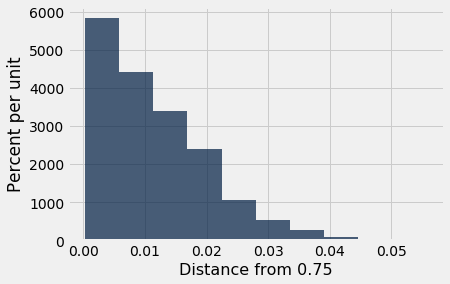

In [9]:
repetitions = 5000

sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(model_colors, total_plants)
    proportion_purple = np.count_nonzero(new_sample == 'Purple')/total_plants
    sampled_stats = np.append(sampled_stats, abs(proportion_purple - 0.75))

results = Table().with_column('Distance from 0.75', sampled_stats)
results.hist()

**Conclusion of the test.** The observed value of the statistic, based on Mendel's data, is 0.00888 which is just under 0.01. That's right in the heart of this distribution.

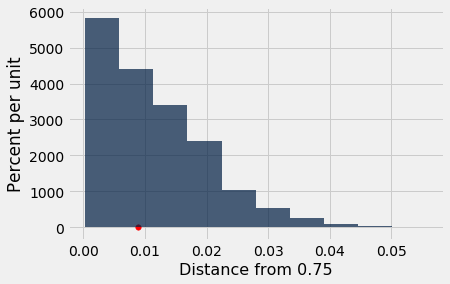

In [10]:
results.hist()

#Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(observed_statistic, 0, color='red', s=30);

The statistic based on Mendel's data is consistent the distribution that our simulation predicts based on Mendel's model. Thus the data support the null hypothesis – Mendel's model is good – more than they support the alternative.

### P-values and the Meaning of "Consistent" ###

In the example about Alameda County juries, it was apparent that our observed test statistic was far from what was predicted by the null hypothesis. In the example about pea flowers, it is just as clear that the observed statistic is consistent with the distribution that the null predicts. So in both of the examples, it is clear which hypothesis to choose.

But sometimes the decision is not so clear. Whether the observed test statistic is consistent with its predicted distribution under the null hypothesis is a matter of judgment. We recommend that you provide your judgment along with the value of the test statistic and a graph of its predicted distribution under the null. That will allow your reader to make his or her own judgment about whether the two are consistent.

If you don't want to make your own judgment, there are conventions that you can follow. These conventions are based on what is called the **observed significance level** or *P-value* for short. The P-value is a chance computed using the probability distribution of the test statistic, and can be approximated by using the empirical distribution in Step 3. 

**Practical note on finding P-values.** For now, we will just give a mechanical method for finding the value; meaning and interpretation will follow in the next section. The method: Place the observed test statistic on the horizontal axis of the histogram, and find the proportion in the tail starting at that point. That's the P-value, or rather a pretty good approximation to the P-value based on the empirical distribution. 

In [11]:
empirical_P = np.count_nonzero(sampled_stats >= observed_statistic)/repetitions
empirical_P

0.5396

The observed statistic of 0.00888 is pretty close to the median of all the values of the statistic generated under Mendel's model. You can think of that as a quantification of our earlier comment that the observed statistic is "right in the heart" of the distribution predicted by the null.

But what if it had been further away? For example, what if the observed statistic had been 0.035? Then what would we have concluded?

In [12]:
np.count_nonzero(sampled_stats >= 0.035)/repetitions

0.0154

That's quite a small proportion. If a P-value is small, that means the tail beyond it is small, and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis better than they support the null. 

So if our observed statistic had been 0.035 instead of 0.00888, we would have chosen the alternative hypothesis.

How small is "small"? There are conventions for this.

- If the P-value is less than 5%, the result is called "statistically significant."

- If the P-value is even smaller – less than 1% – the result is called "highly statistically significant."

In both cases, the test concludes that the data support the alternative hypothesis.

### Historical Note on the Conventions ###

The determination of statistical significance, as defined above, has become standard in statistical analyses in all fields of application. When a convention is so universally followed, it is interesting to examine how it arose. 

The method of statistical testing – choosing between hypotheses based on data in random samples – was developed by Sir Ronald Fisher in the early 20th century. Sir Ronald might have set the convention for statistical significance somewhat unwittingly, in the following statement in his 1925 book *Statistical Methods for Research Workers*. About the 5% level, he wrote, "It is convenient to take this point as a limit in judging whether a deviation is to be considered significant or not."

What was "convenient" for Sir Ronald became a cutoff that has acquired the status of a universal constant. No matter that Sir Ronald himself made the point that the value was his personal choice from among many: in an article in 1926, he wrote, "If one in twenty does not seem high enough odds, we may, if we prefer it draw the line at one in fifty (the 2 percent point), or one in a hundred (the 1 percent point). Personally, the author prefers to set a low standard of significance at the 5 percent point ..."

Fisher knew that "low" is a matter of judgment and has no unique definition. We suggest that you follow his excellent example. Provide your data, make your judgment, and explain why you made it.

### The TA's Defense ###
Tests of hypotheses are among the most widely used methods of statistical inference. We have seen them used in contexts as varied as jury selection and flowering pea plants. In the final example of this section, we will perform a test of hypotheses in another completely different context.

A Cornell Statistics class of about 350 students was divided into 12 discussion sections led by Teaching Assistants (TAs). After the prelim, students in Section 3 noticed that their scores were on average lower than the rest of the class. 

In such situations, students tend to grumble about the section's TA. Surely, they feel, there must have been something wrong with the TA's teaching. Or else why would their section have done worse than others?

The TA, typically more experienced about statistical variation, often has a different perspective: if you simply draw a section of students at random from the whole class, their average score could resemble the score that the students are unhappy about, just by chance.

The TA's position is a clearly stated chance model. Let's test it out.

**Null Hypothesis.** The average score of Section 3 is like the average score of the same number of students picked at random from the class. 

**Alternative Hypothesis.** No, it's too low.

The table `scores` contains the section number and prelim score for each student in a large class. The prelim scores were integers in the range 0 through 25; 0 means that the student didn't take the test.

In [13]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Prelim
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


Here are the average scores in the 12 sections. 

In [14]:
scores.group('Section', np.mean).show()

Section,Prelim mean
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


Section 3 did score a bit lower, on average, than the other sections. Does this look like chance variation?

We know how to find out. Let's start by picking a "Section 3" at random from the whole class and see what its average score is; and then do that again and again. 

First, we need the number of students in Section 3:

In [15]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


Now our plan is to pick 27 students at random from the class and find their average score. 

The scores of all the students are in a table with one row per student. So we will use `sample` to randomly select rows, using the option `with_replacement=False` so that we sample without replacement. (Later we will see that the results are almost the same as what we'd get by sampling *with* replacement instead).

In [16]:
scores.sample(27, with_replacement=False).column('Prelim').mean()

15.148148148148149

We are ready to simulate the empirical distribution of the random "Section 3" mean.

Empirical P-value: 0.0526


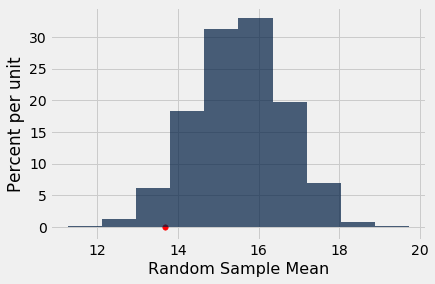

In [17]:
section_3_mean = 13.6667

repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    new_mean = scores.sample(27, with_replacement=False).column('Prelim').mean()
    means = np.append(means, new_mean)
    
emp_p_value = np.count_nonzero(means <= section_3_mean)/repetitions
print('Empirical P-value:', emp_p_value)
results = Table().with_column('Random Sample Mean', means)
results.hist()  

#Plot the observed statistic as a large red point on the horizontal axis
plots.scatter(section_3_mean, 0, color='red', s=30);

From the histogram, the low mean in section 3 looks somewhat unusual, but the conventional 5% cut-off gives the TA's hypothesis the benefit of the doubt.  With that cut-off, we say that the result is not statistically significant.